### 一.原理介绍
主成分分析想做的事如下图所示，将原始坐标系$<w_1,w_2>$变换为新的坐标系$<w'_1,w'_2>$，是的原始数据在新的坐标系下具有如下特点：   

（1）在第一个坐标轴上的投影分散的尽可能的开（第一主成分），在第二个坐标轴上的投影其次（第二主成分）....  

（2）新的坐标轴彼此正交，这样可以去掉变量间的相关性，如下面第一张图中数据几乎排在$y=x$这条线上，而经过pca的变换后，数据各维度失去了相关性
![avatar](./source/19_pca1.png)

### 二.求解第一个坐标轴（第一主成分）

接下来让我们先从第一个坐标轴入手，根据我们的目标，我们要让原始的数据点$X\in R^{m\times n}$在某一个方向$w\in R^n$上的投影点尽可能的分散，这里涉及两个点：   

（1）如果计算投影坐标；   

（2）如何衡量分散程度；   

下面依次推导
#### 投影坐标的计算

抽样坐标的计算推导如下图，将某样本点$x$看做一个向量，将坐标轴方向向量$w$移动到与$x$相同的原点，假设两向量的夹角为$\theta$，在$w^Tw=1$的约束条件下，经过推导可得投影坐标可表示为$x^Tw$
![avatar](./source/19_pca2.png)

#### 分散程度的衡量：方差

对于分散程度，显然最直接的一个参考指标可以使用方差，方差越大说明数据越分散，那么在坐标轴$w$上所有数据投影点的方差如下：  

$$
S(X,w)=\sum_{i=1}^m(x_i^Tw-\bar{x}^Tw)^2
$$  

这里，$x_i\in R^n$，$\bar{x}=\frac{\sum_{i=1}^m x_i}{m}$，通常为了方便可以先进行**去中心化**的操作，即令$X$中的样本点都减去它每个维度的均值

$$
X=X-\bar{X}
$$  

所以这时的方差就可以简单写作：   

$$
S(X,w)=\sum_{i=1}^m(x_i^Tw)^2=\sum_{i=1}^m w^Tx_ix_i^Tw=w^T\sum_{i=1}^m (x_ix_i^T)w=w^T[x_1,x_2,...,x_m]\cdot\begin{bmatrix}
x_1^T\\ 
x_2^T\\ 
...\\ 
x_m^T
\end{bmatrix}w=w^TX^TXw
$$  

所以，我们我们要求最优$w^*$便是  

$$
w^*=arg\max_{w}w^TX^TXw
$$  

这依赖于$X^TX$的性质

### 三.基于$X^TX$求解前$k$个主成分

由于$X^TX$为实对称矩阵，我们可以对其进行正交分解，且其特征值均大于等于0，所以我们可以将$X^TX$分解为如下形式：   

$$
X^TX=U\Lambda U^T=[u_1,u_2,...,u_n]\begin{bmatrix}
\lambda_1 & 0 & 0 & 0 \\ 
0 & \lambda_2 & 0 & 0\\ 
0 & 0 & \ddots & 0\\ 
0 & 0 & 0 & \lambda_n
\end{bmatrix}\begin{bmatrix}
u_1^T\\ 
u_2^T\\ 
...\\ 
u_n^T
\end{bmatrix}
$$  

其中，$\lambda_1\geq\lambda_2\geq\cdots\geq\lambda_n\geq 0,u_i^Tu_j=\left\{\begin{matrix}
1 &i=j \\ 
0 &i\neq j
\end{matrix}\right.
$

对于，任意$w(s.t. w^Tw=1)$，都有：   

$$
w^TX^TXw=(w^Tu_1)^2\lambda_1+(w^Tu_2)^2\lambda_2+\cdots+(w^Tu_n)^2\lambda_n
$$  


由于$u_1,u_2,...,u_n$彼此正交，且为单位向量，所以$(w^Tu_1)^2+(w^Tu_2)^2+\cdots+(w^Tu_n)^2=1$，所以结果也就可以看出来了：   

（1）对于第一个坐标轴（第一主成分），即是$\lambda_1$对应的特征向量$u_1$...

（2）对于第二个坐标轴（第二主成分），即是$\lambda_2$对应的特征向量$u_2$...

（3）......  

通常，我们选择前$k$个坐标轴进行映射$U_k=[u_1,u_2,...,u_k]$，生成的新数据为$X_k=XU_k$

### 四.代码实现

#### 造伪数据
将数据点$(x,y)$分布在$y=3x+2$上下

In [32]:
import numpy as np
#造伪样本
X=np.linspace(0,10,100)
Y=3*X+2
Y+=np.random.normal(size=(X.shape))*1.0#添加噪声
data=np.c_[X,Y]

Text(0, 0.5, 'y')

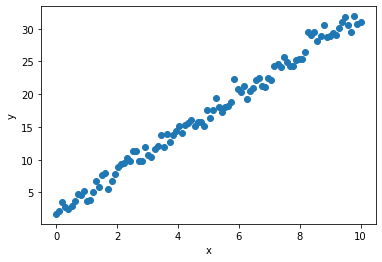

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data[:,0],data[:,1])
plt.xlabel('x')
plt.ylabel('y')

#### 去中心化

In [34]:
data=data-np.mean(data,axis=0,keepdims=True)
plt.scatter(data[:,0],data[:,1])
plt.xlabel('x')
plt.ylabel('y')

#### 求$X^TX$

In [35]:
tmp = data / np.sqrt(data.shape[0] - 1)
xTx=tmp.T @ tmp 

#### 正交分解

In [36]:
eig_vals,eig_vecs=np.linalg.eig(xTx)

In [37]:
eig_vals

array([ 0.08977172, 87.24806855])

In [38]:
eig_vecs

array([[-0.95000089, -0.31224721],
       [ 0.31224721, -0.95000089]])

校验一下特征分解结果

In [39]:
print(eig_vecs @ np.diag(eig_vals) @ eig_vecs.T - xTx)
np.isclose(eig_vecs @ np.diag(eig_vals) @ eig_vecs.T,xTx)

array([[1.06581410e-14, 3.55271368e-15],
       [3.55271368e-15, 0.00000000e+00]])

由于`np.linalg.eig`的特征值并未按从大到小的顺序排序，所以我们需要进行一下重排

In [40]:
sorted_indice=np.argsort(-1*eig_vals)#默认是升序排序
eig_vals=eig_vals[sorted_indice]
eig_vecs[:]=eig_vecs[:,sorted_indice]

现在的特征矩阵，第一列便是第一主成分，第二列便是第二主成分，接下来我们可以轻易拿到转换后的数据，只需要去中心化数据矩阵和特征矩阵相乘即可

In [41]:
new_data=data @ eig_vecs

#### 变化后的数据

(-20.0, 20.0)

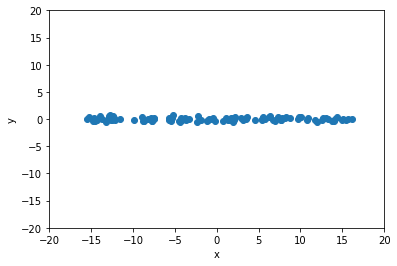

In [42]:
plt.scatter(new_data[:,0],new_data[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-20, 20)
plt.ylim(-20, 20)

可以发现，最终得到了我们想要的结果...，最后将代码整理一下，放到`ml_models.decomposition.PCA`中